# Data From: [house-rent-prediction-dataset](https://www.kaggle.com/rkb0023/houserentpredictiondataset)
# Download the data from this link and copy the file to the template `data` folder.

In [1]:
# Imports.
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import NuSVR
pd.pandas.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
JSON_FILE_NAME = "json_data/data.json" # This file will contain numerical encoding for `object` dtype columns in the dataset.

In [3]:
df = pd.read_csv(r"C:\Users\kids\PycharmProjects\MachineLearningProjects\HouseRentPricePrediction\data\housing_train.csv") # Loading the data.

In [4]:
df.head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


The columns 'id', `url`, `region_url` and `image_url` are useless columns, hence we will drop them.
`lat` and `long` columns are useless because we have the region of each home.

In [5]:
USELESS_COLUMNS = ["id", "url", "region_url", "image_url", "lat", "long", "description"]
df.drop(USELESS_COLUMNS, axis=1, inplace=True) # Dropping useless columns

In [6]:
df.head()


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,al


# Exploratory Data Analysis


In [7]:
df.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
state                       object
dtype: object

In [8]:
df.isna().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
state                          1
dtype: int64

In [9]:
df = df.dropna(subset=["state"])

In [10]:
df.isna().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
state                          0
dtype: int64

In [11]:
def plot_null_relation(df: pd.DataFrame, columns_with_na: list):
    """
    This function plots a bar chart that shows null and non-null values relationship with the target variable.
    :param df: The data.
    :param columns_with_na: Columns with null values.
    """

    for column in columns_with_na:
        df_copy = df.copy() # Copying X to prevent altering is.
        df_copy[column] = np.where(df_copy[column].isna(), 1, 0)
        fig = plt.figure(figsize=(16, 9))
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.title(f"Average rent price of a house when {column} is not null/null", fontsize=16)
        df_copy.groupby(column).price.median().plot(kind="bar", color=["green", "blue"])
        plt.show()

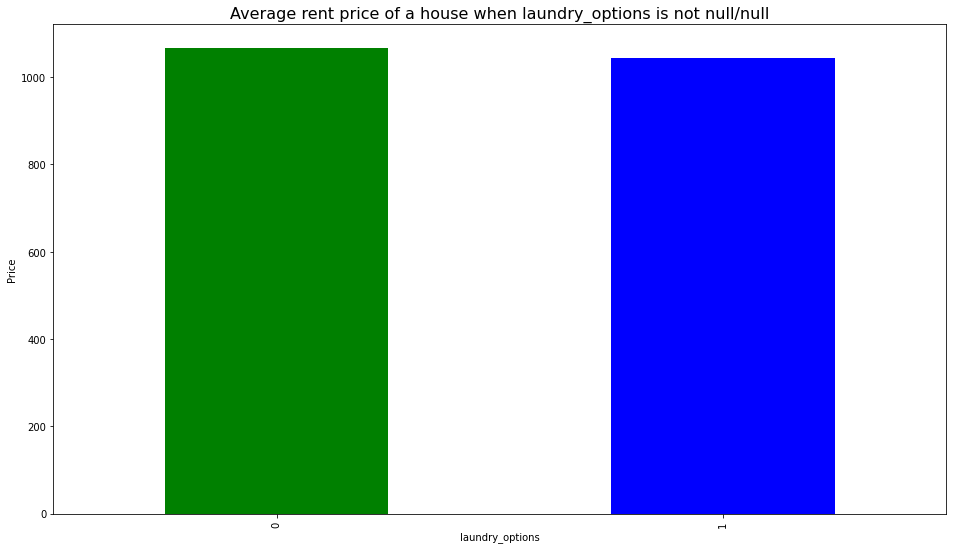

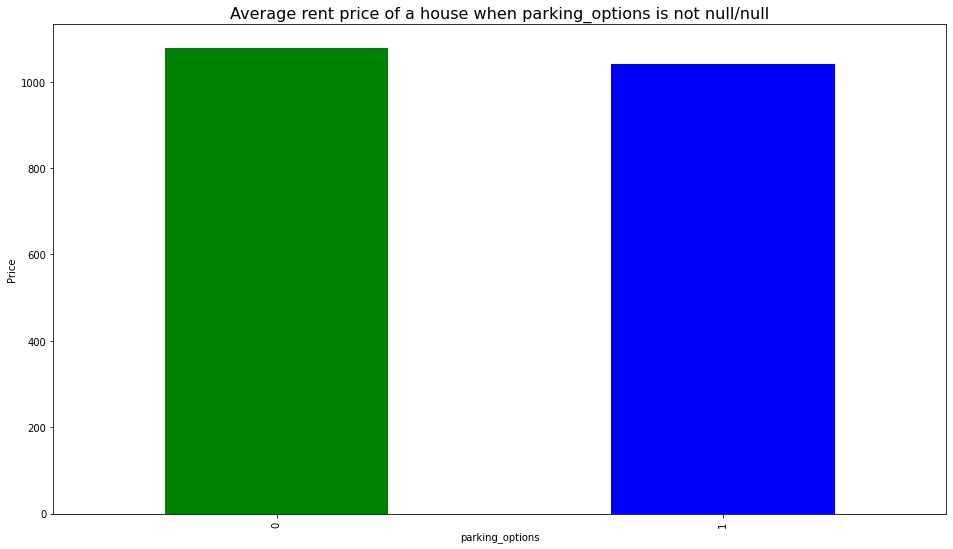

In [12]:
columns_with_na = [column for column in df.columns if df[column].hasnans]
plot_null_relation(df, columns_with_na)

From these charts we can see that there are not significant anomalies in the median rent price whenever one of the parameters is null.

In [13]:
def plot_pie(df: pd.DataFrame, columns_to_plot_pie_chart: list):
    """
    TRhis function plots a a pie chart for every column.
    :param df: The data.
    :param columns_to_plot_pie_chart: Columns in `df` which we want to plot pie charts for.
    """
    for column in columns_to_plot_pie_chart:
        fig = plt.figure(figsize=(16, 9))
        plt.title(f"Percentage of each value in {column}:", fontsize=16)
        plt.xlabel(column)
        labels = df[column].unique()
        labels = pd.Series(labels).dropna()
        plt.pie(df[column].value_counts(), labels=labels, explode=[0.1] * labels.shape[0], autopct="%.2f%%", shadow=True)
        plt.show()

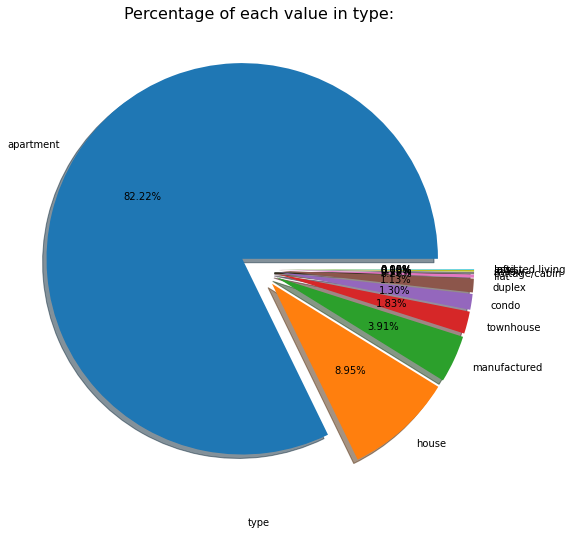

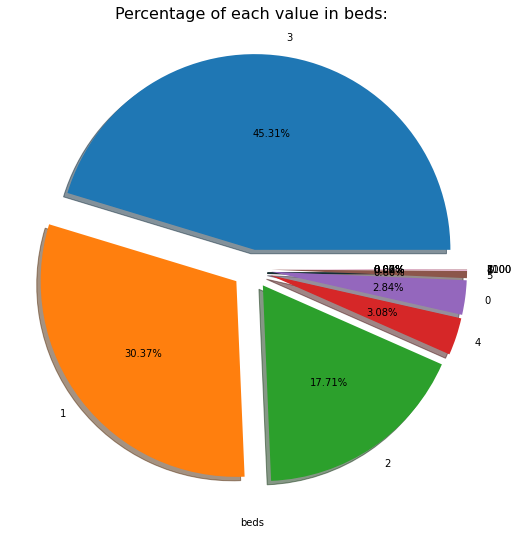

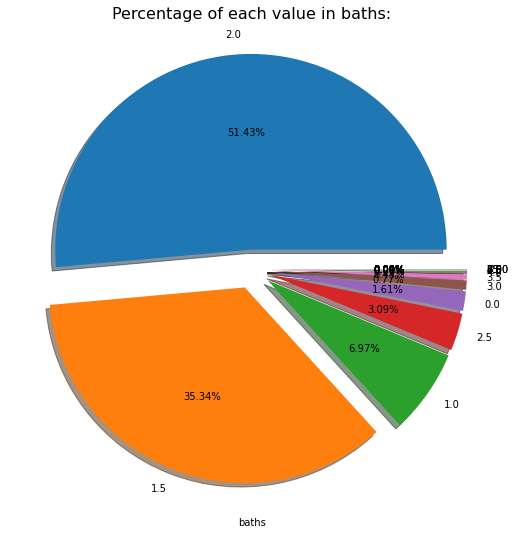

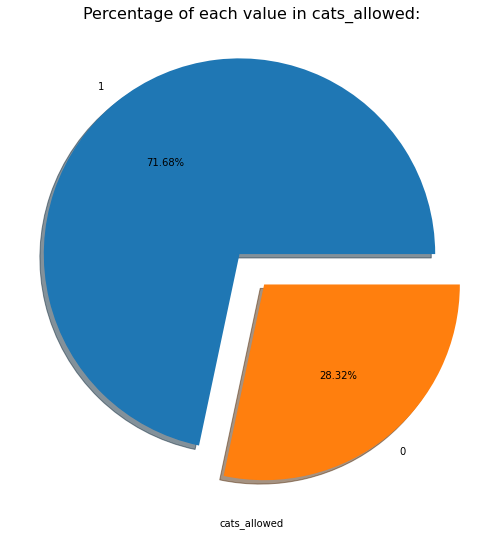

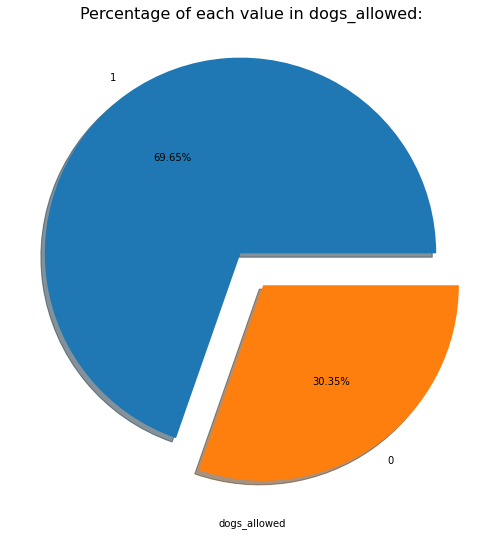

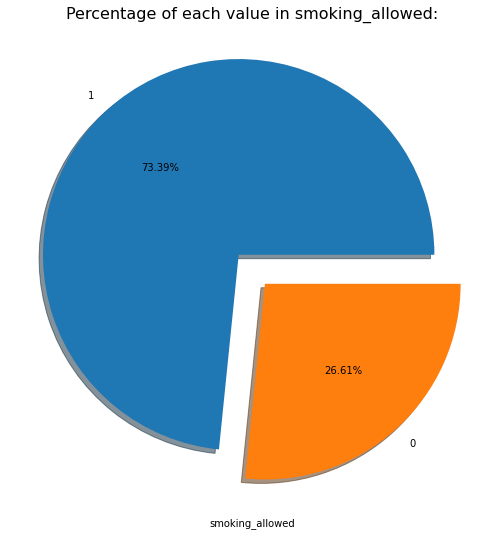

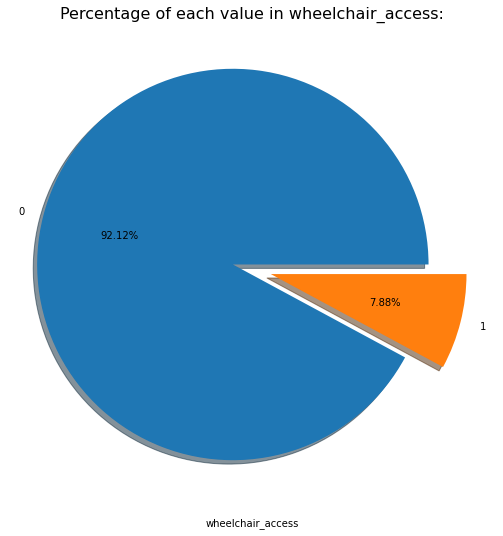

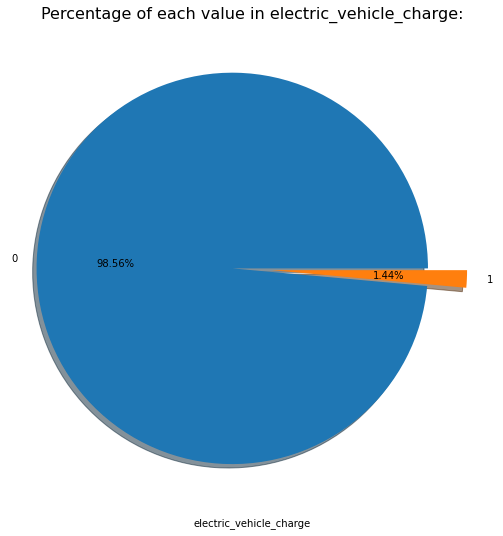

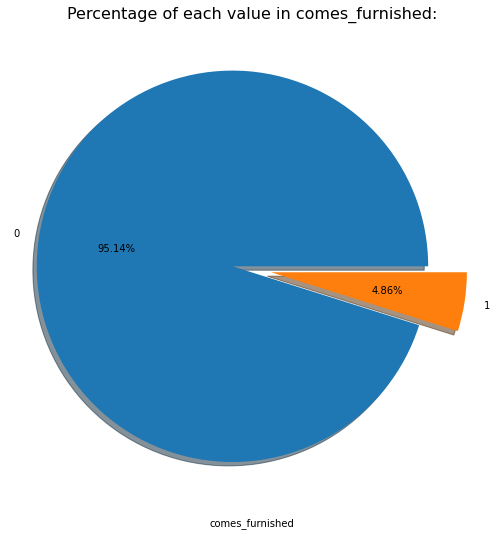

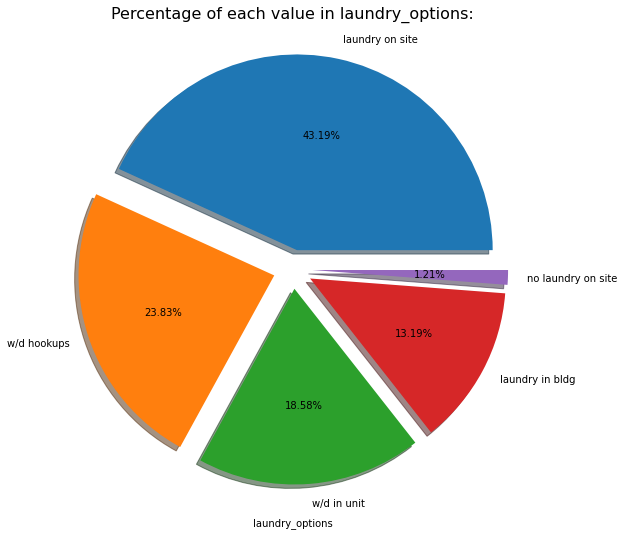

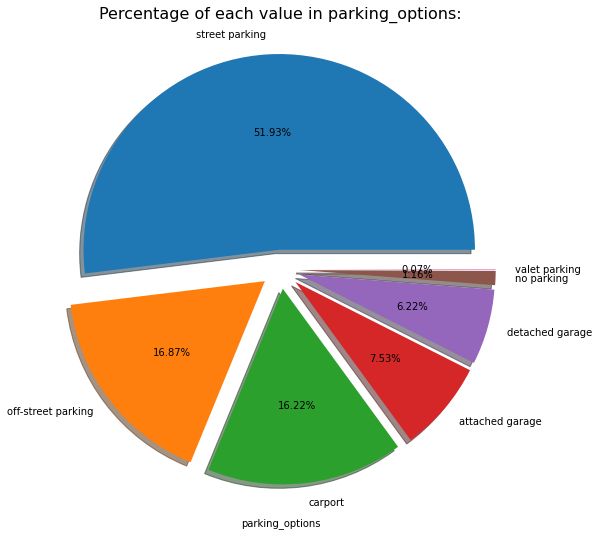

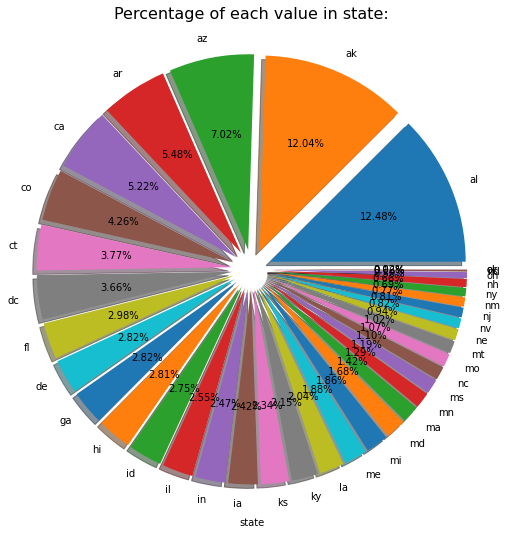

In [14]:
columns_to_plot_pie_chart = ['type', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state']
plot_pie(df, columns_to_plot_pie_chart)

In [15]:
def plot_median_rent_price_and_feature_relationship(df: pd.DataFrame, feature: str):
    """
    This function plots a bar chart that represents the relation between the state and the median rent price.
    :param df: The data.
    :param feature: A column in `df`. We want to see the relationship between the unique values in `df[feature]`
        and the median price for each value.
    """
    df_copy = df.copy()

    state_count = df_copy[feature].unique().shape[0]
    fig = plt.figure(figsize=(16, 9))
    plt.title(f"Median rent price in each {feature}", fontsize=20)
    plt.xlabel("State")
    plt.ylabel("Median Price")
    df_copy.groupby(feature).price.median().plot(kind="bar", color=np.random.rand(state_count, 3))
    plt.show()

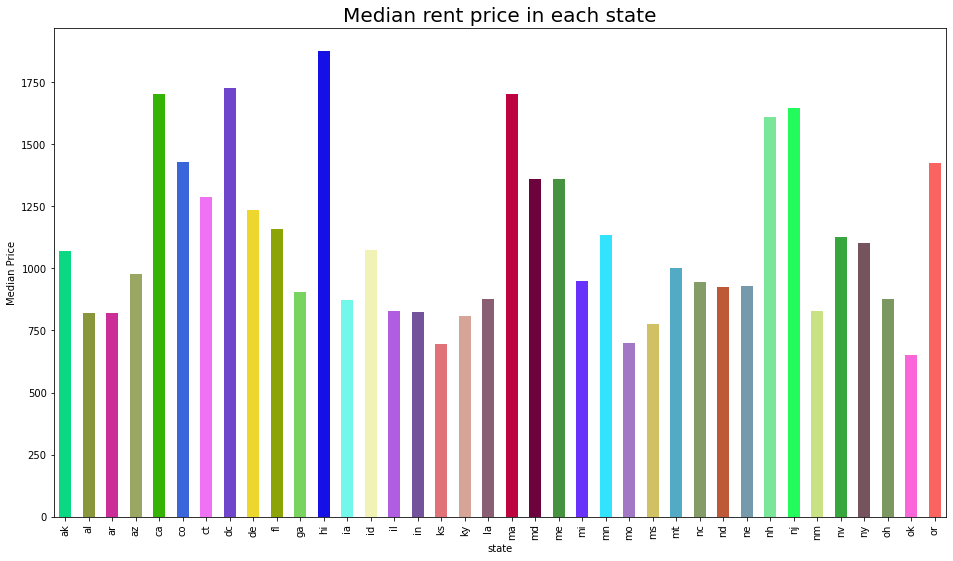

In [16]:
plot_median_rent_price_and_feature_relationship(df, "state")

From this chart, we can see a direct relationship between the state and the rent price.

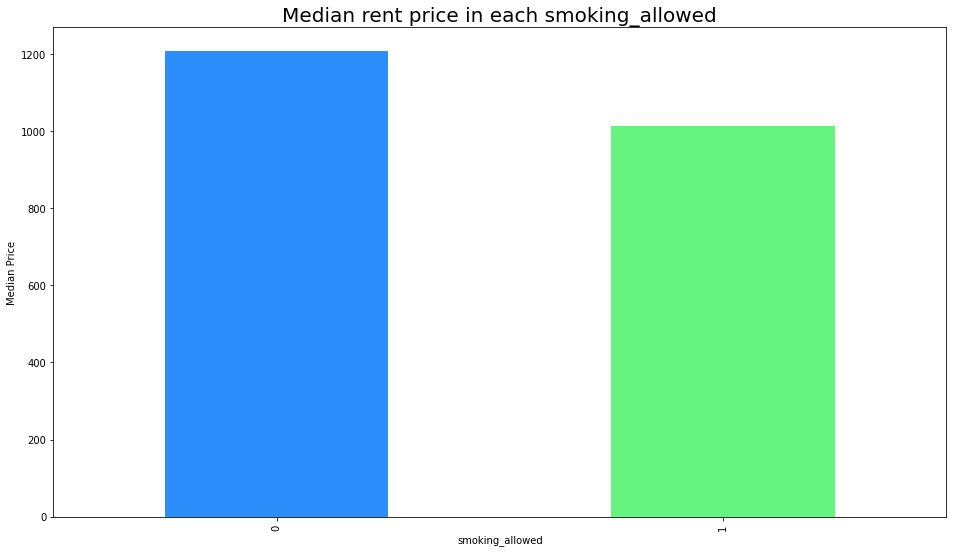

In [17]:
plot_median_rent_price_and_feature_relationship(df, "smoking_allowed")

Accommodations in which smoking isn't allowed are more expensive than accommodations in which smoking is allowed.

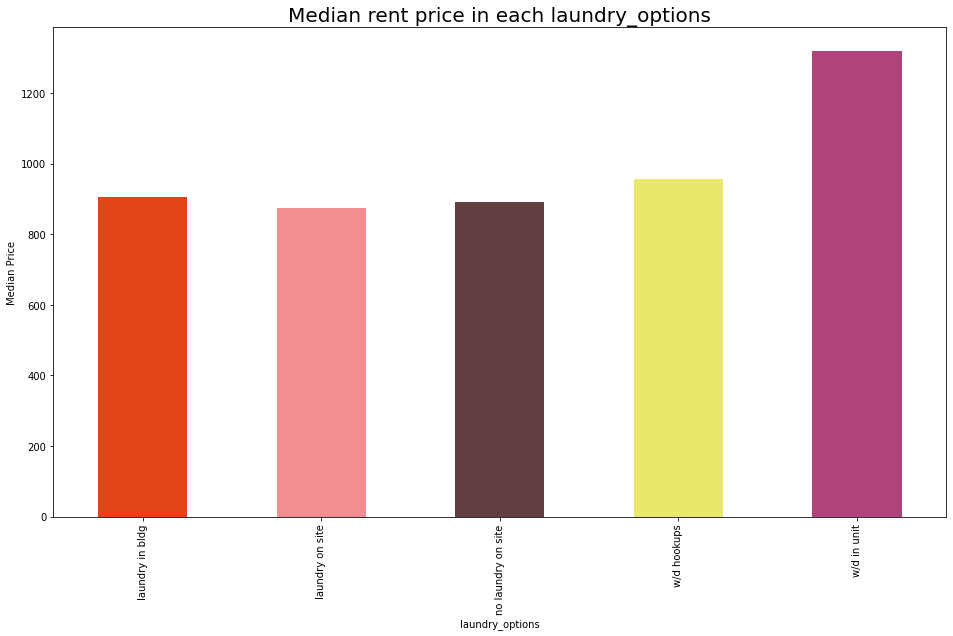

In [18]:
plot_median_rent_price_and_feature_relationship(df, "laundry_options")

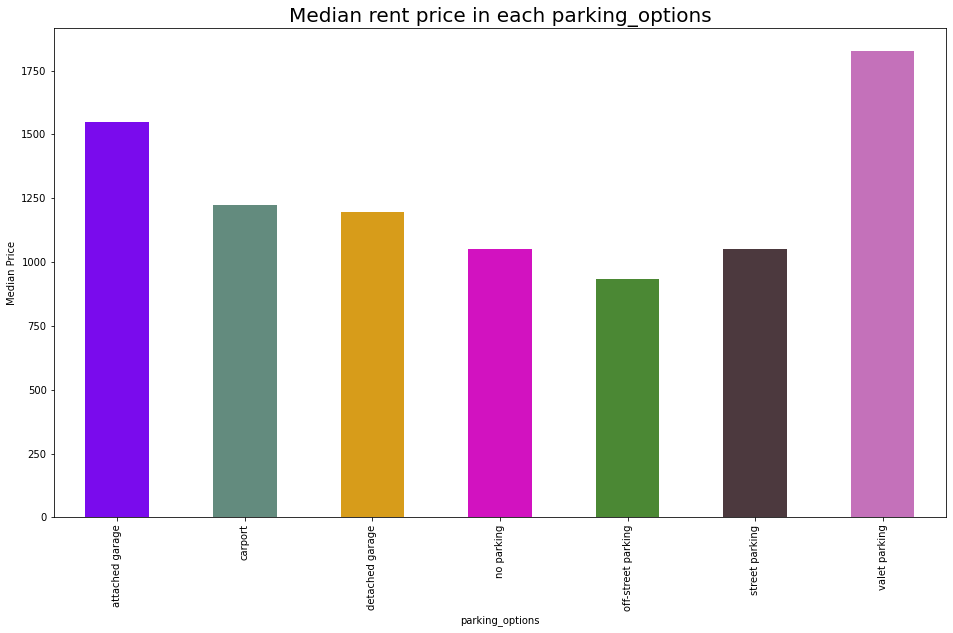

In [19]:
plot_median_rent_price_and_feature_relationship(df, "parking_options")

# Preprocessing the data

In [20]:
X = df.drop("price", axis=1)
y = df.price

In [21]:
del df # `df` is useless at this point, so we delete it.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [23]:
X_train.isna().sum()

region                         0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            40752
parking_options            71352
state                          0
dtype: int64

In [24]:
X_test.isna().sum()

region                         0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            13559
parking_options            23783
state                          0
dtype: int64

After dropping all `Nan` values, we can preprocess the data.

In [25]:
def get_encoder(data: pd.DataFrame, column: str) -> dict:
    """
    This function creates encoding dictionary for `column`.
    :param data: A DataFrame.
    :param column: A column in `data`. `data[column]` has `object` dtype.
    :return: Encoding dictionary.

    Example:

    >>> data = pd.DataFrame(["a", "b", "c", "d"], columns=["letters"])
    >>> data

       letters
    0	a
    1	b
    2	c
    3	d

    >>> get_dict_encoder(data, 'letters')

    """

    column_classes = data[column].unique()

    column_classes_labeled = { f"{column}" :
        {key : value for key, value in zip(column_classes, range(len(column_classes)))}
    }
    return column_classes_labeled


def get_encoders(data: pd.DataFrame, columns_to_encode) -> list:
    """
    This function creates encoding dictionaries for `columns_to_encode`.
    :param data: A DataFrame.
    :param columns_to_encode: Columns in  `data`. `data[column]` has `object` dtype.
    :return: Encoding dictionaries for the desired columns.
    """
    encoders = []
    for column in columns_to_encode:
        encoder = get_encoder(data, column)
        encoders.append(encoder)

    return encoders


def dump_data(data: dict):
    """
    This function dumps `data` into a JSON file(`data.json`).
    :param data: Data to dump into a JSON file.
    """
    with open(JSON_FILE_NAME, 'w') as f:
        json.dump(data, f, indent=4)


def encode_data(data: pd.DataFrame, columns_to_encode: list) -> pd.DataFrame:
    """
    This function encoded the data.
    :param data: A DataFrame to encode `object` columns dtype in.
    :param columns_to_encode: A column in `data` to encode.
    :return: A DataFrame with the encoded data.
    """

    encoders = get_encoders(data, columns_to_encode)

    for column, encoder in zip(columns_to_encode, encoders):
        data[column] = data[column].map(encoder[column])

    return data

In [26]:
COLUMNS_TO_ENCODE = ["region", "type", "laundry_options", "parking_options", "state"]
ENCODERS = get_encoders(X_train, COLUMNS_TO_ENCODE)
data_to_dump_into_json = ENCODERS.copy() # We will insert the encoders and the scalers' values into a JSON file.

In [27]:
X_train = encode_data(X_train, COLUMNS_TO_ENCODE)

<ipython-input-25-c7d39a469b6a>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(encoder[column])


In [28]:
X_train.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
212250,0,0,961,2,2.0,1,1,0,0,0,0,0,0,0
10639,1,0,1182,3,2.0,1,1,1,0,0,0,1,1,1
47656,2,1,2051,3,2.5,1,1,1,0,0,0,2,2,2
14434,3,0,633,1,1.0,1,1,0,0,0,0,2,3,1
240951,4,0,900,2,2.0,1,1,0,1,0,0,0,4,3


In [29]:
X_test = encode_data(X_test, COLUMNS_TO_ENCODE)

<ipython-input-25-c7d39a469b6a>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(encoder[column])


In [30]:
X_test.head()


,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
158381,0,0,1500,4,1.0,0,0,0,0,0,0,0,0,0
75296,1,1,1000,2,2.0,1,1,1,0,0,0,1,1,1
30617,2,1,610,1,1.0,1,1,0,0,1,0,2,2,2
129386,3,1,1097,2,2.0,1,1,1,0,0,1,2,3,3
176287,4,1,491,0,1.0,1,1,1,0,0,0,2,3,4


In [31]:
def scale(data: pd.DataFrame, columns_to_scale, save_scaler_data=False) -> pd.DataFrame:
    """
    This function scales the columns in `columns_to_scale` that are columns in `data`.
    :param data: The data.
    :param columns_to_scale: The columns in `data` that we want to scale.
    :param save_scaler_data: bool, Whether to save the scalers or not, default to `False`.
    :return: A DataFrame with the scaled data.
    """

    for column in columns_to_scale:
        scaler = MinMaxScaler()
        data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))

        if save_scaler_data:
            data_to_dump_into_json.append({ f"scaler_{column}" :
                {f"scaler_{column}_min" : scaler.data_min_.tolist()[0],
                f"scaler_{column}_max" : scaler.data_max_.tolist()[0]}})
            joblib.dump(scaler, f"scalers/{column}_scaler.joblib")

    return data

# def normalize(data: pd.DataFrame, columns_to_normalize, save_max_num=False) -> pd.DataFrame:
#     """
#     This function normalizes the columns in `columns_to_normalize` that are columns in `df`.
#     Data Normalization is done in this way:
#         >>> data[column] /= data[column].max()
#
#     :param data: The data.
#     :param columns_to_normalize: The columns to normalize.
#     :param save_max_num: whether to save the max number in each column. This will be used for the app.
#     :return: A DataFrame with normalized data.
#     """
#
#     for column in columns_to_normalize:
#         max_value = int(data[column].max())
#         data[column] /= max_value
#
#         if save_max_num: # Saving the max value in `column`.
#             data_to_dump_into_json.append({f"{column}_max_value" : max_value})
#
#     return data

We will only scale the column `sqfeet`.
We will normalize all columns except `sqfeet`(because it's already scaled)
and columns with binary values(columns with `0` and `1` values) because it's unnecessary.

In [32]:
COLUMNS_TO_SCALE = ["sqfeet"]
COLUMNS_TO_NORMALIZE = X_train.columns.drop(["sqfeet", "cats_allowed", "dogs_allowed", "smoking_allowed",
                                             "wheelchair_access", "electric_vehicle_charge",
                                             "comes_furnished"])

In [33]:
COLUMNS_TO_NORMALIZE

Index(['region', 'type', 'beds', 'baths', 'laundry_options', 'parking_options',
       'state'],
      dtype='object')

In [34]:
X_train = scale(X_train, COLUMNS_TO_SCALE)

<ipython-input-31-e0110034f2a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))


In [35]:
X_train.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
212250,0,0,0.000115,2,2.0,1,1,0,0,0,0,0,0,0
10639,1,0,0.000141,3,2.0,1,1,1,0,0,0,1,1,1
47656,2,1,0.000244,3,2.5,1,1,1,0,0,0,2,2,2
14434,3,0,0.000075,1,1.0,1,1,0,0,0,0,2,3,1
240951,4,0,0.000107,2,2.0,1,1,0,1,0,0,0,4,3


In [36]:
# X_train = normalize(X_train, COLUMNS_TO_NORMALIZE, save_max_num=True)
#

In [37]:
# X_train.head()

In [38]:
X_test = scale(X_test, COLUMNS_TO_SCALE, save_scaler_data=True)

<ipython-input-31-e0110034f2a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))


In [39]:
X_test.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
158381,0,0,0.001471,4,1.0,0,0,0,0,0,0,0,0,0
75296,1,1,0.000981,2,2.0,1,1,1,0,0,0,1,1,1
30617,2,1,0.000598,1,1.0,1,1,0,0,1,0,2,2,2
129386,3,1,0.001076,2,2.0,1,1,1,0,0,1,2,3,3
176287,4,1,0.000481,0,1.0,1,1,1,0,0,0,2,3,4


In [40]:
# X_test = normalize(X_test, COLUMNS_TO_NORMALIZE)
#

In [41]:
# X_test.head()

In [42]:
df_train = pd.concat([X_train, y_train], axis=1)

In [43]:
df_train.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,price
212250,0,0,0.000115,2,2.0,1,1,0,0,0,0,0,0,0,1327
10639,1,0,0.000141,3,2.0,1,1,1,0,0,0,1,1,1,1994
47656,2,1,0.000244,3,2.5,1,1,1,0,0,0,2,2,2,2298
14434,3,0,0.000075,1,1.0,1,1,0,0,0,0,2,3,1,1115
240951,4,0,0.000107,2,2.0,1,1,0,1,0,0,0,4,3,975


In [44]:
corr_df_train = df_train.corr()

Finding the correlation between different features in the dataset.

<AxesSubplot:>

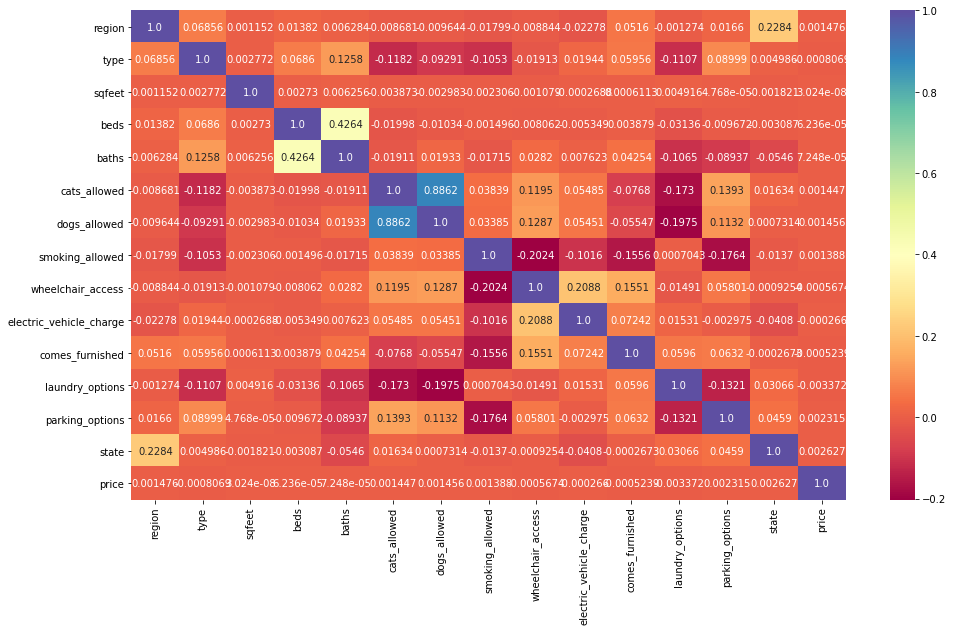

In [45]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr_df_train, annot=True, cmap="Spectral", fmt=".4")


In [46]:
corr_X_train = X_train.corr()

Finding the correlation between different features in `X_train`.

<AxesSubplot:>

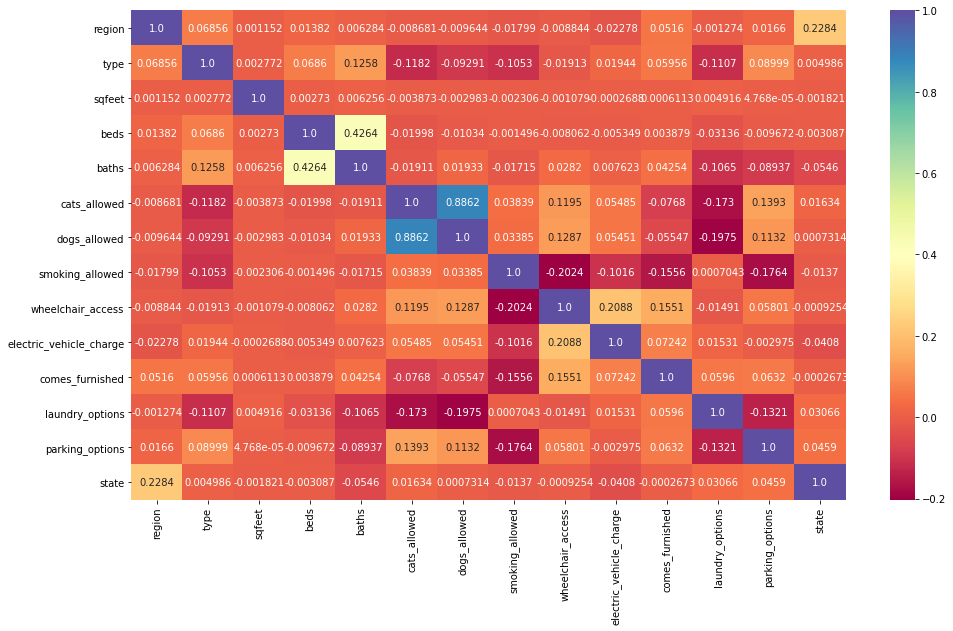

In [47]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr_X_train, annot=True, cmap="Spectral", fmt=".4")

In [48]:
scaler_y_train = MinMaxScaler()
scaler_y_test = MinMaxScaler()

In [49]:
y_train = scaler_y_train.fit_transform(y_train.values.reshape(-1, 1))

In [50]:
y_train

array([[4.79354306e-07],
       [7.20295769e-07],
       [8.30110170e-07],
       ...,
       [3.23302264e-07],
       [4.96693422e-07],
       [1.26431053e-07]])

In [51]:
y_test = scaler_y_test.fit_transform(y_test.values.reshape(-1, 1))

In [52]:
data_to_dump_into_json.append({ "target_value_data" :
    {"scaler_y_test_min" : scaler_y_test.data_min_.tolist()[0],
                "scaler_y_test_max" : scaler_y_test.data_max_.tolist()[0]}}) # Saving the scaler's data to scale new data in the app.

In [53]:
joblib.dump(scaler_y_test, "scalers/scaler_y_test.joblib")

['scalers/scaler_y_test.joblib']

In [54]:
y_test

array([[9.12500000e-05],
       [9.40833333e-05],
       [2.02750000e-04],
       ...,
       [1.34166667e-04],
       [1.29583333e-04],
       [1.37500000e-04]])

Flattening the target values so that we won't receive any warnings.

In [55]:
y_train = y_train.ravel()

In [56]:
y_test = y_test.ravel()

In [57]:
X_train.shape

(198891, 14)

In [58]:
X_test.shape

(66298, 14)

In [59]:
dump_data(data_to_dump_into_json) # Dumping all the data to a JSON file.

Now our data is ready, and we can build ML models.
However, before doing that, we need to find out what are the most helpful features and only use them.
That will make our ML model more accurate, and it will consume less memory.

# Feature Selection

For our ML Model we will only use ten features.


In [60]:
selector = SelectKBest(f_regression, k=10)

In [61]:
selector.fit(X_train, y_train)

SelectKBest(score_func=<function f_regression at 0x00000206FFC02E50>)

In [62]:
selector.scores_

array([1.67969561e+00, 2.75409497e-02, 2.84270007e-06, 6.07065233e-04,
       5.17620711e-03, 3.87315067e-01, 4.21259429e-01, 3.61646007e-01,
       5.62271439e-02, 1.39655470e-02, 4.75817546e-02, 1.85439061e+00,
       4.44017336e-01, 6.58008398e-01])

In [ ]:
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.25, criterion="mae", loss="quantile")
model.fit(X_train, y_train)

c:\users\kids\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


In [ ]:
model.score(X_test, y_test)